### Let's start by importing the necessary packages

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import the data

In [31]:
# get the data from csv files into a DataFrame

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

### Overview of the data

In [32]:
print ("Dimension of train data {}".format(train.shape))
print ("Dimension of test data {}".format(test.shape))

Dimension of train data (891, 12)
Dimension of test data (418, 11)


In [33]:
# preview the train data
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We see that more than 75% of the values in the *Cabin* feature are missing.

Almost 20% of the *Age* values are missing.

Only 2 values are missing in *Embarked* column.

Categorical features: Pclass, Sex, Embarked, SibSp, Parch

Numerical features: Age, Fare

Features that are not likely to help in prediction: Name, PassengerId, Ticket, Cabin

In [35]:
#Drop features that are not likely to help

train.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [36]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Univariate graphical representations

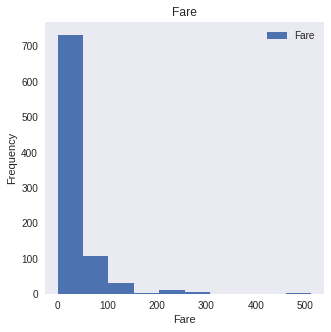

In [37]:
# Plot the histogram of Fare

fig = plt.figure(figsize=(5, 5))

train.Fare.plot(kind='hist')
plt.xlabel('Fare')
plt.title("Fare" )
plt.legend(loc='best')
plt.grid()

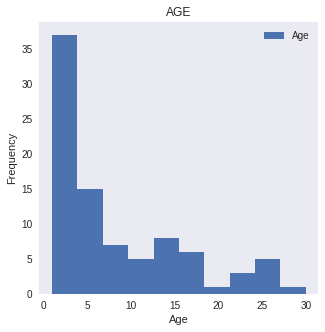

In [38]:
#Plot the histogram of Age

fig = plt.figure(figsize=(5, 5))

train.Age.value_counts().plot(kind='hist')
plt.xlabel('Age')
plt.title("AGE" )
plt.legend(loc='best')
plt.grid()

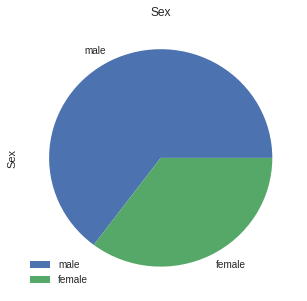

In [39]:
#Plot the pie chart of Sex

fig = plt.figure(figsize=(5, 5))

train.Sex.value_counts().plot(kind='pie')
plt.title("Sex" )
plt.legend(loc='best')
plt.grid()

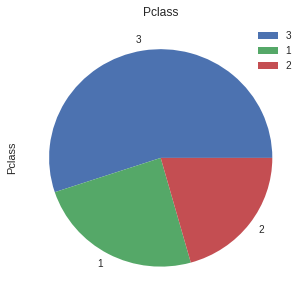

In [40]:
#Plot the pie chart of Pclass

fig = plt.figure(figsize=(5, 5))
train.Pclass.value_counts().plot(kind='pie')
plt.title("Pclass" )
plt.legend(loc='best')
plt.grid()

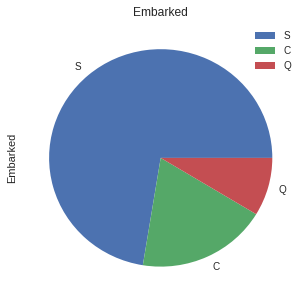

In [41]:
#Plot the pie chart of Embarked

fig = plt.figure(figsize=(5, 5))
train.Embarked.value_counts().plot(kind='pie')
plt.title("Embarked" )
plt.legend(loc='best')
plt.grid()

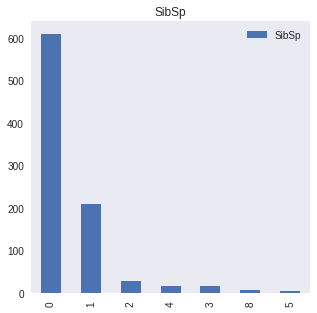

In [42]:
#Plot the bar graph of SibSp

fig = plt.figure(figsize=(5, 5))
train.SibSp.value_counts().plot(kind='bar')
plt.title("SibSp" )
plt.legend(loc='best')
plt.grid()

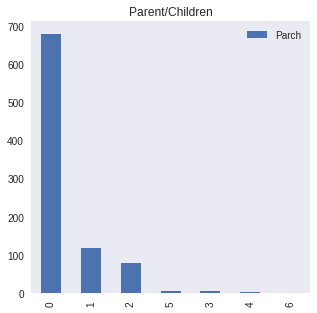

In [43]:
#Plot the bar graph of Parch

fig = plt.figure(figsize=(5, 5))
train.Parch.value_counts().plot(kind='bar')
plt.title("Parent/Children" )
plt.legend(loc='best')
plt.grid()

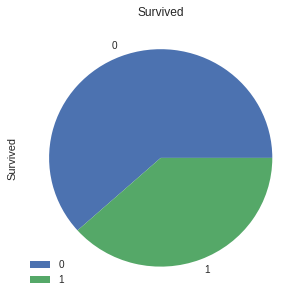

In [44]:
#Plot the pie chart of Survived

fig = plt.figure(figsize=(5, 5))
train.Survived.value_counts().plot(kind='pie')
plt.title("Survived" )
plt.legend(loc='best')
plt.grid()

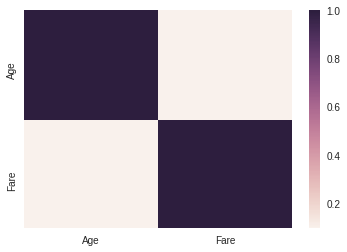

In [45]:
# Plot correlation heatmap of numerical values
sns.heatmap(train[['Age', 'Fare']].corr())

In [46]:
train.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,549,549,424,549,549,549,549
1,342,342,290,342,342,342,340


In [47]:
# Encode categorical variables
# Nominal variables -> One hot encode

train = pd.get_dummies(train, columns=['Parch', 'Embarked', 'SibSp', 'Sex', 'Pclass'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
Survived      891 non-null int64
Age           714 non-null float64
Fare          891 non-null float64
Parch_0       891 non-null uint8
Parch_1       891 non-null uint8
Parch_2       891 non-null uint8
Parch_3       891 non-null uint8
Parch_4       891 non-null uint8
Parch_5       891 non-null uint8
Parch_6       891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
SibSp_0       891 non-null uint8
SibSp_1       891 non-null uint8
SibSp_2       891 non-null uint8
SibSp_3       891 non-null uint8
SibSp_4       891 non-null uint8
SibSp_5       891 non-null uint8
SibSp_8       891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
dtypes: float64(2), int64(1), uint8(22)
memory usage: 40.1 KB


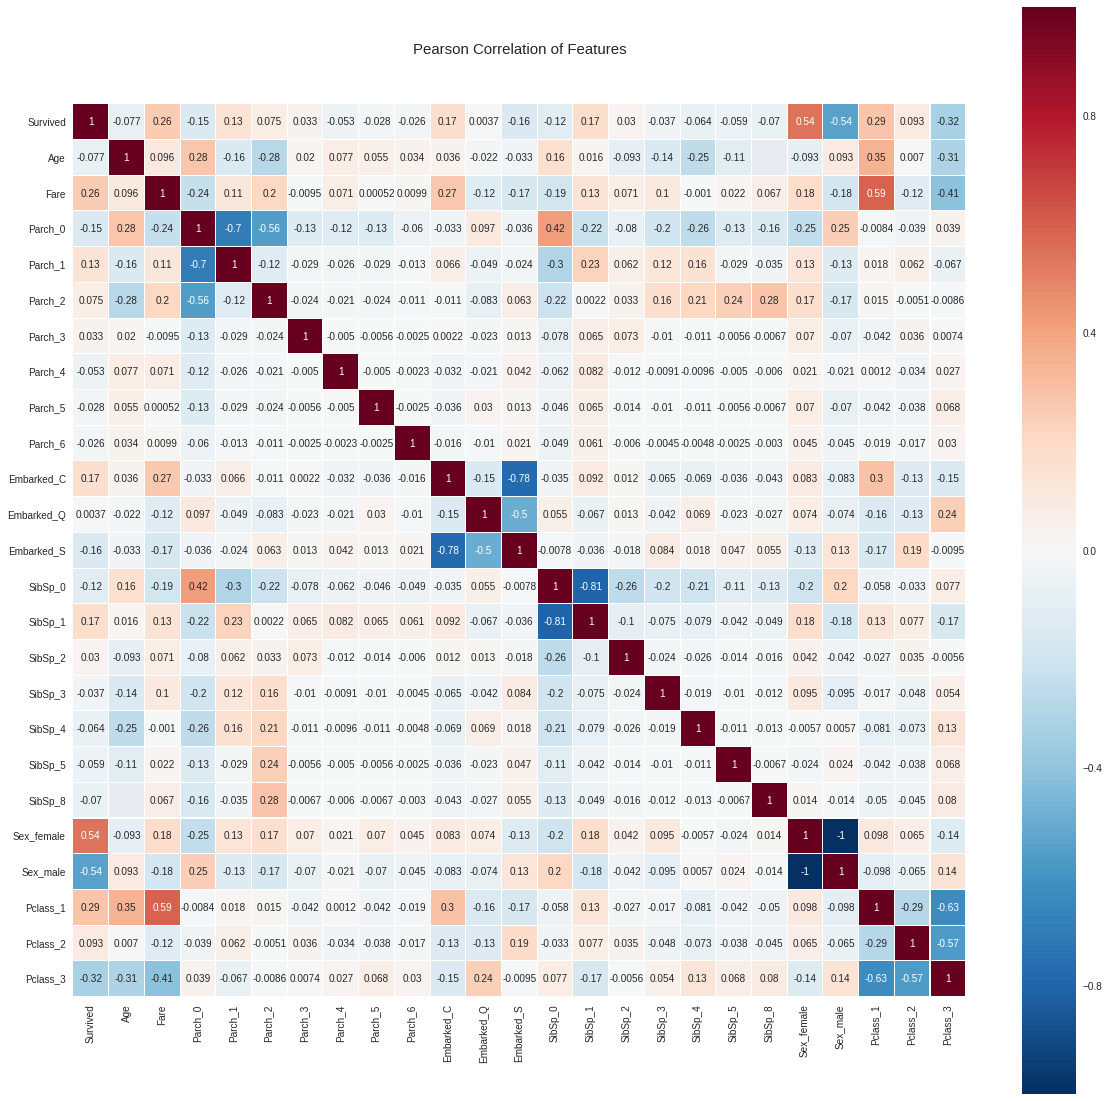

In [53]:

plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

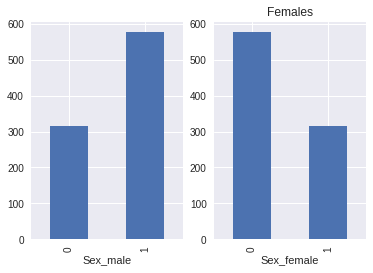

In [120]:
# How many males survived and how many didn't VS How many females survived and how many didn't
plt.subplot(1,2,1)
train.groupby('Sex_male').count().Survived.plot(kind='bar')
plt.subplot(1,2,2)
train.groupby('Sex_female').count().Survived.plot(kind='bar', title='Females')

Mean Fare of those who survived:  48.3954076023
Median Fare of those who did not survive:  10.5


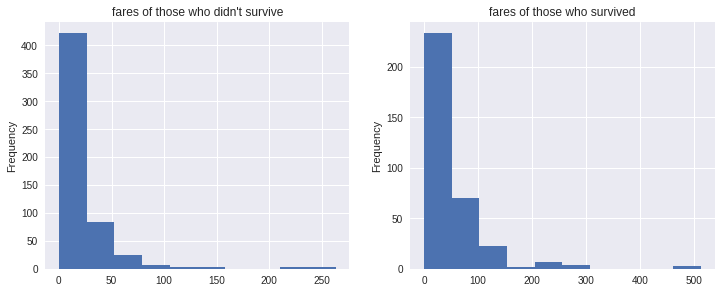

In [159]:
# Fare

# get fare for survived & didn't survive passengers 
fare_not_survived = train["Fare"][train["Survived"] == 0]
fare_survived     = train["Fare"][train["Survived"] == 1]

#plot
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
fare_not_survived.plot(kind='hist', title='fares of those who didn\'t survive')

plt.subplot(2, 2, 2)
fare_survived.plot(kind='hist', title='fares of those who survived')

print ('Mean Fare of those who survived: '), np.nanmean(fare_survived)
print ('Median Fare of those who did not survive: '), np.nanmedian(fare_not_survived)

Mean Age of those who survived:  28.3436896552
Median Age of those who did not survive:  28.0


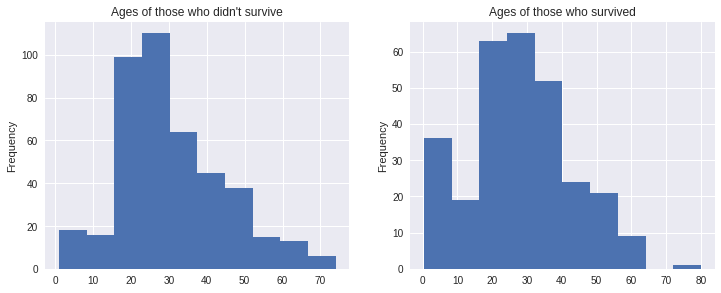

In [162]:
# Age

# get age for survived & didn't survive passengers 
Age_not_survived = train["Age"][train["Survived"] == 0]
Age_survived     = train["Age"][train["Survived"] == 1]

#plot
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
Age_not_survived.plot(kind='hist', title='Ages of those who didn\'t survive');

plt.subplot(2, 2, 2)
Age_survived.plot(kind='hist', title='Ages of those who survived');

print ('Mean Age of those who survived: '), np.nanmean(Age_survived)
print ('Median Age of those who did not survive: '), np.nanmedian(Age_not_survived)

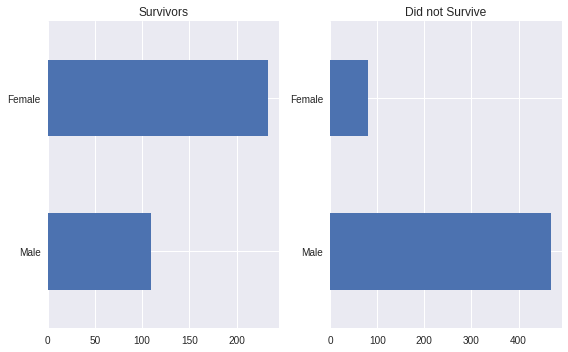

In [234]:
# Sex

sex_survived = {'Male': len(train.Survived[train.Sex_male == 1][train.Survived == 1]),
              'Female': len(train.Survived[train.Sex_female == 1][train.Survived == 1])}
sex_not_survived = {'Male': len(train.Survived[train.Sex_male == 1][train.Survived == 0]),
              'Female': len(train.Survived[train.Sex_female == 1][train.Survived == 0])}
sex_survived = pd.DataFrame.from_dict(sex_survived, orient='index')
sex_not_survived = pd.DataFrame.from_dict(sex_not_survived, orient='index')

#plot bar

plt.figure(figsize=(8,5))
plt.subplot(121)
sex_survived[0].plot(kind='barh', title='Survivors')
plt.subplot(122)
sex_not_survived[0].plot(kind='barh', title='Did not Survive')
plt.tight_layout()